<img src = "https://drive.google.com/uc?export=view&id=10DJdk95gzrY6H-dKEFKshN814gdMc9FV" alt = "Encabezado MLDS" width = "100%">  </img>

# **Entendimiento y Preparación de los Datos**
---

## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. Sarah Fonseca C.C.: 1032487465
2. Christian Camilo Barriga C.C.: 1023860937
3. Andrés Serrano C.C.: 1026574836

### **0.1 Carga de datos**
---

Antes de comenzar con la carga de datos, es importante mencionar que el presente proyecto usará imagenes de una biblioteca personal, por lo que extraeremos las imagenes de nuestras carpetas de google drive, como se muestra a continuación.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Como tal, es importante tener en cuenta que dividimos las imagenes en dos, según sean consideradas buenas muestras de soldadura, o malas muestras.

In [ ]:
BASE_PATH = '/content/drive/MyDrive/clasificador_soldadura/data'
RAW_GOOD_PATH = os.path.join(BASE_PATH, 'raw_data/good')
RAW_BAD_PATH = os.path.join(BASE_PATH, 'raw_data/bad')

posteriormente verificamos que existna las carpetas en cuestión.

In [ ]:
def verify_path(path: str):
  if not os.path.exists(path):
    print(f"Error: La carpeta no existe en {path}")
    return False
  else:
    return True

In [ ]:
verify_path(RAW_GOOD_PATH)

True

In [ ]:
verify_path(RAW_BAD_PATH)

True

A continuación se presenta una serie de funciones auxiliares para el trabajo con las imagenes.

In [ ]:
# Funciones auxiliares
def is_valid_img(filename: str):
    """Verifica si el archivo es una imagen válida"""
    return filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))

def get_img_size(path: str):
    """Obtiene las dimensiones de la imagen"""
    with Image.open(path) as img:
        return img.size

def img_to_record(directory: str, filename: str, label: int):
    """Crea un registro con la información de la imagen"""
    width, height = get_img_size(os.path.join(directory, filename))
    return [filename, width, height, label]

def img_to_grayscale_array(filepath: str, resize_to=None):
    """Convierte la imagen a escala de grises y opcionalmente la redimensiona"""
    with Image.open(filepath) as img:
        img_gray = img.convert('L')
        if resize_to:
            img_gray = img_gray.resize(resize_to, Image.Resampling.LANCZOS)
        return np.array(img_gray)

def procesar_y_mostrar_imagen(ruta_imagen, clasificacion, mostrar_img=False):
    """Procesa la imagen y la muestra (opcional)"""
    try:
        # Abrir y convertir a blanco y negro
        imagen_color = Image.open(ruta_imagen)
        imagen_bn = imagen_color.convert('L')

        # Obtener el nombre del archivo sin extensión para el guardado
        nombre_base = os.path.splitext(os.path.basename(ruta_imagen))[0]
        nombre_guardado = f"{nombre_base}_bn.jpeg"

        # Guardar la imagen en blanco y negro
        imagen_bn.save(nombre_guardado)

        # Mostrar la imagen
        if mostrar_img:
          plt.figure(figsize=(6, 4))
          plt.imshow(imagen_bn, cmap='gray')
          plt.title(f"{clasificacion.upper()} - {os.path.basename(ruta_imagen)}")
          plt.axis('off')
          plt.show()

        print(f"Procesada: {os.path.basename(ruta_imagen)} : {clasificacion.upper()}")
        return True

    except Exception as e:
        print(f"✗ Error procesando {ruta_imagen}: {e}")
        return False

## **1. Análisis Exploratorio de los Datos**
---

### **1.1. Resumen General**
---
para responder las preguntas pertinentes a esta sección, tales como ¿Cuántos documentos tiene el *dataset*? ¿En qué formato están almacenados los datos? ¿Qué tamaño en MB tiene el conjunto de datos? vale la pena dividir el análisis en dos, por una parte vamos a trabajar con imagenes, mientras que luego estas imagenes se interpretaran como datos. Por lo tanto, a continuación se mostraran cada una de las imagenes de las que disponemos junto con su formato y con la etiqueta que les corresponde.

En un primer lugar, haremos un procesamiento básico de dichas imagenes y luego mostraremos un pequeño resumen de cuántas imagenes tenemos, el formato de estas imagenes y cuántas imagenes tenemos cargadas en nuestras carpetas de drive.

In [ ]:
# Procesar imágenes GOOD (label = 1)

print("Imagenes GOOD")


valid_good_imgs = list(filter(is_valid_img, os.listdir(RAW_GOOD_PATH)))
good_records = []

for filename in valid_good_imgs:
    if procesar_y_mostrar_imagen(os.path.join(RAW_GOOD_PATH, filename), "GOOD", False):
        record = img_to_record(RAW_GOOD_PATH, filename, 1)  # Label 1 para GOOD
        good_records.append(record)

Imagenes GOOD
Procesada: 1A0.jpg : GOOD
Procesada: 1A1.jpg : GOOD
Procesada: 1A2.jpg : GOOD
Procesada: 1A3.jpg : GOOD
Procesada: 1A4.jpg : GOOD
Procesada: 1A5.jpg : GOOD
Procesada: 1A6.jpg : GOOD
Procesada: 1A7.jpg : GOOD
Procesada: 1A8.jpg : GOOD
Procesada: 1A9.jpg : GOOD
Procesada: 1A10.jpg : GOOD
Procesada: 1A11.jpg : GOOD
Procesada: 1B0.jpg : GOOD
Procesada: 1B1.jpg : GOOD
Procesada: 1B2.jpg : GOOD
Procesada: 1B3.jpg : GOOD
Procesada: 1B4.jpg : GOOD
Procesada: 1B5.jpg : GOOD
Procesada: 1B6.jpg : GOOD
Procesada: 1B7.jpg : GOOD
Procesada: 1B8.jpg : GOOD
Procesada: 1B9.jpg : GOOD
Procesada: 2A0.jpg : GOOD
Procesada: 2A1.jpg : GOOD
Procesada: 2A2.jpg : GOOD
Procesada: 2A3.jpg : GOOD
Procesada: 2A4.jpg : GOOD
Procesada: 2A5.jpg : GOOD
Procesada: 2A6.jpg : GOOD
Procesada: 2A7.jpg : GOOD
Procesada: 2A8.jpg : GOOD
Procesada: 2B0.jpg : GOOD
Procesada: 2B1.jpg : GOOD
Procesada: 2B2.jpg : GOOD
Procesada: 2B3.jpg : GOOD
Procesada: 2B4.jpg : GOOD
Procesada: 2B5.jpg : GOOD
Procesada: 2B6.jpg : G

In [ ]:
# Procesar imágenes BAD (label = 0)

print("Imagenes BAD ")


valid_bad_imgs = list(filter(is_valid_img, os.listdir(RAW_BAD_PATH)))
bad_records = []

for filename in valid_bad_imgs:
    if procesar_y_mostrar_imagen(os.path.join(RAW_BAD_PATH, filename), "BAD", False):
        record = img_to_record(RAW_BAD_PATH, filename, 0)  # Label 0 para BAD
        bad_records.append(record)

Imagenes BAD 
Procesada: 12A1.png : BAD
Procesada: 13A4.jpeg : BAD
Procesada: 13A7.jpeg : BAD
Procesada: 12B1.png : BAD
Procesada: 12B4.png : BAD
Procesada: 13A1.jpeg : BAD
Procesada: 12A9.png : BAD
Procesada: 12A8.png : BAD
Procesada: 13B3.jpeg : BAD
Procesada: 13A2.jpeg : BAD
Procesada: 13A5.jpeg : BAD
Procesada: 12B8.png : BAD
Procesada: 13B1.jpeg : BAD
Procesada: 12B3.png : BAD
Procesada: 13A0.jpeg : BAD
Procesada: 12B2.png : BAD
Procesada: 12A0.png : BAD
Procesada: 13B0.jpeg : BAD
Procesada: 12B9.png : BAD
Procesada: 13B8.jpeg : BAD
Procesada: 13B9.jpeg : BAD
Procesada: 13B7.jpeg : BAD
Procesada: 12B5.png : BAD
Procesada: 12B7.png : BAD
Procesada: 13B5.jpeg : BAD
Procesada: 12B6.png : BAD
Procesada: 12A7.png : BAD
Procesada: 13A6.jpeg : BAD
Procesada: 12A4.png : BAD
Procesada: 13A3.jpeg : BAD
Procesada: 13B6.jpeg : BAD
Procesada: 13A8.jpeg : BAD
Procesada: 12A3.png : BAD
Procesada: 13A9.jpeg : BAD
Procesada: 12A6.png : BAD
Procesada: 13B2.jpeg : BAD
Procesada: 12A5.png : BAD
Proce

A continuación ordenaremos la información de las imagenes en datasets para así poder realizar una exposición como tal de estos archivos.

In [ ]:
df_good = pd.DataFrame(good_records, columns=["filename", "width", "height", "label"])
df_bad = pd.DataFrame(bad_records, columns=["filename", "width", "height", "label"])

df_completo = pd.concat([df_good, df_bad], ignore_index=True)

df_completo['clasificacion'] = df_completo['label'].map({1: 'GOOD', 0: 'BAD'})

print("dataset completo")

print(f"Total de imágenes procesadas: {len(df_completo)}")
print(f"Imágenes GOOD (1): {len(df_good)}")
print(f"Imágenes BAD (0): {len(df_bad)}")

print("\nDataset Good:")
display(df_good.head())

print("\nDataset Bad:")
display(df_bad.head())

print("\nDataset Combinado:")
display(df_completo.head())

# Estadísticas del dataset
print("estadísticas del dataset")

print(f"Dimensiones del dataset: {df_completo.shape}")
print(f"\nDistribución de labels:")
print(df_completo['label'].value_counts())
print(f"\nDistribución de clasificaciones:")
print(df_completo['clasificacion'].value_counts())

print(f"\nEstadísticas de dimensiones de imágenes:")
print(f"Ancho promedio: {df_completo['width'].mean():.1f} px")
print(f"Alto promedio: {df_completo['height'].mean():.1f} px")
print(f"Ancho mínimo: {df_completo['width'].min()} px")
print(f"Ancho máximo: {df_completo['width'].max()} px")
print(f"Alto mínimo: {df_completo['height'].min()} px")
print(f"Alto máximo: {df_completo['height'].max()} px")

# Guardar el dataset completo
df_completo.to_csv('dataset_imagenes_clasificadas.csv', index=False)
print(f"\n✓ Dataset guardado en 'dataset_imagenes_clasificadas.csv'")

dataset completo
Total de imágenes procesadas: 180
Imágenes GOOD (1): 60
Imágenes BAD (0): 120

Dataset Good:


,filename,width,height,label
0,1A0.jpg,1795,330,1
1,1A1.jpg,1796,276,1
2,1A2.jpg,1765,335,1
3,1A3.jpg,1824,272,1
4,1A4.jpg,1829,282,1



Dataset Bad:


,filename,width,height,label
0,12A1.png,1827,203,0
1,13A4.jpeg,1748,357,0
2,13A7.jpeg,1742,323,0
3,12B1.png,1884,191,0
4,12B4.png,1830,253,0



Dataset Combinado:


,filename,width,height,label,clasificacion
0,1A0.jpg,1795,330,1,GOOD
1,1A1.jpg,1796,276,1,GOOD
2,1A2.jpg,1765,335,1,GOOD
3,1A3.jpg,1824,272,1,GOOD
4,1A4.jpg,1829,282,1,GOOD


estadísticas del dataset
Dimensiones del dataset: (180, 5)

Distribución de labels:
label
0    120
1     60
Name: count, dtype: int64

Distribución de clasificaciones:
clasificacion
BAD     120
GOOD     60
Name: count, dtype: int64

Estadísticas de dimensiones de imágenes:
Ancho promedio: 1852.8 px
Alto promedio: 303.1 px
Ancho mínimo: 1705 px
Ancho máximo: 2125 px
Alto mínimo: 162 px
Alto máximo: 548 px

✓ Dataset guardado en 'dataset_imagenes_clasificadas.csv'


De esta manera, el anterior codigo nuos muestras la cantidad de imagenes que se poseen, mostrandonos el tamaño del conjunto de datos y las divisiones de estas imagenes entre buenas y malas muestras. Ahora bien, también podemos reconocer que las imagenes estan en formatos diferentes; jpeg, png y jpg, por lo que debemos trabajar con estas diferencias.

Ahora bien, en una segunda parte, podemos analizar estas imagenes en tanto datos, para ello aplicaremos un histogram oriented gradient (HOG), tal y como mostraremos a continuación, comenzando por unas funciones que serán aplicadas para esto.



Acontinuación revisaremos el formato de las imagenes, lo que permitirá realizar una estandarización previa a trabajar con los datos.

In [ ]:
from collections import Counter

def summarize_image_formats(folder):
    formats = []
    for f in os.listdir(folder):
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp')):
            try:
                with Image.open(os.path.join(folder, f)) as img:
                    formats.append(img.format)
            except:
                pass
    return Counter(formats)

print("Formatos en good:", summarize_image_formats(RAW_GOOD_PATH))
print("Formatos en bad:", summarize_image_formats(RAW_BAD_PATH))

Formatos en good: Counter({'MPO': 60})
Formatos en bad: Counter({'PNG': 100, 'JPEG': 20})


Lo anterior nos permite darnos cuenta que si bien hay archivos cuyo nombre termina en `.jpg` en el caso especifico del directorio de buenas soldaduras, en realidad su formato es `.mpo`, adicionalmente en el directorio de malas soldaduras vemos que hay imagenes en `.png` y `.jpeg`, por lo que es imporante estandarizar en un solo formato de imágenes. Estandarizaremos a `.png` siendo el formato más adecuado para los analisis que realizaremos posteriormente. Este formato conserva de forma adecuada bordes y gradientes de las imagenes, lo que nos interesa para el Histogram of Oriented Gradients (HOG), que abordaremos posteriormente.

In [ ]:
def convert_images(input_dir, output_dir, format='PNG', overwrite=False):
    """
    Convierte todas las imágenes de un directorio a un formato específico.
    """
    os.makedirs(output_dir, exist_ok=True)
    converted = []

    for filename in os.listdir(input_dir):
        filepath = os.path.join(input_dir, filename)
        if not os.path.isfile(filepath):
            continue
        try:
            with Image.open(filepath) as img:
                img = img.convert("RGB")
                base_name, _ = os.path.splitext(filename)
                output_path = os.path.join(output_dir, f"{base_name}.{format.lower()}")
                if not overwrite and os.path.exists(output_path):
                    continue
                img.save(output_path, format=format, quality=95 if format=='JPEG' else None)
                converted.append(output_path)
        except Exception as e:
            print(f"Error con {filename}: {e}")
    print(f"{len(converted)} imágenes convertidas a {format}")
    return converted

In [ ]:
PROCESSED_IMG_PATH = os.path.join(BASE_PATH, 'processed_data')

convert_images(RAW_GOOD_PATH, os.path.join(PROCESSED_IMG_PATH, 'good'), format="PNG")

60 imágenes convertidas a PNG


['/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A0.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A1.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A2.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A3.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A4.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A5.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A6.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A7.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A8.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A9.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A10.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/good/1A11.png',
 '

In [ ]:
convert_images(RAW_GOOD_PATH, os.path.join(PROCESSED_IMG_PATH, 'bad'), format="PNG")

60 imágenes convertidas a PNG


['/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/1A0.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/1A1.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/1A2.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/1A3.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/1A4.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/1A5.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/1A6.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/1A7.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/1A8.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/1A9.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/1A10.png',
 '/content/drive/MyDrive/clasificador_soldadura/data/processed_data/bad/1A11.png',
 '/content/dri

In [ ]:
from skimage.feature import hog

def img_processing_hog_features(path: str, resize_to = (200, 200)):
  """Extrae las características HOG de una imagen dada."""
  img_array = img_to_grayscale_array(path, resize_to)
  hog_features = hog(
      img_array,
      orientations=9,
      pixels_per_cell=(8,8),
      cells_per_block=(2,2),
      visualize=False,
      block_norm='L2-Hys'
  )
  return hog_features

In [ ]:
PROCESSED_GOOD_PATH = os.path.join(PROCESSED_IMG_PATH, 'good')
PROCESSED_BAD_PATH = os.path.join(PROCESSED_IMG_PATH, 'bad')

In [ ]:
def build_hog_dataset(resize_to=(200,200)):
  """Crea un dataset de características HOG para imágenes 'good' y 'bad'."""
  def get_features(path, label):
    """Obtiene las features HOG de todas las imágenes .png en una carpeta."""
    files = [f for f in os.listdir(path) if f.lower().endswith('.png')]
    return [
        {
            "filename": f,
            "label": label,
            "hog_features": img_processing_hog_features(os.path.join(path, f), resize_to)
        }
        for f in files
    ]

  good_records = get_features(PROCESSED_GOOD_PATH, 'GOOD')
  bad_records = get_features(PROCESSED_BAD_PATH, 'BAD')
  all_records = good_records + bad_records

  df = pd.DataFrame([
      {
          "filename": r["filename"],
          "label": r["label"],
          **{f"hog_{i}": val for i, val in enumerate(r["hog_features"])}
      }
      for r in all_records
  ])

  print(f"Total imágenes procesadas: {len(df)}")
  print(f"Dimensiones del dataset HOG: {df.shape}")
  return df


In [ ]:
hog_df = build_hog_dataset()
hog_df.to_csv("hog_features_dataset.csv", index=False)

Total imágenes procesadas: 120
Dimensiones del dataset HOG: (120, 20738)


In [ ]:
hog_df.tail()

,filename,label,hog_0,hog_1,hog_2,hog_3,hog_4,hog_5,hog_6,hog_7,...,hog_20726,hog_20727,hog_20728,hog_20729,hog_20730,hog_20731,hog_20732,hog_20733,hog_20734,hog_20735
115,4B6.png,BAD,0.365472,0.278594,0.100656,0.000000,0.030757,0.000000,0.000000,0.065802,...,0.326420,0.326420,0.027856,0.020881,0.001827,0.040139,0.037074,0.034123,0.034361,0.107800
116,4B7.png,BAD,0.295241,0.045693,0.000000,0.067951,0.085438,0.000000,0.026901,0.031447,...,0.261785,0.283289,0.036819,0.018589,0.006827,0.028593,0.004277,0.007949,0.028979,0.283289
117,4B8.png,BAD,0.341996,0.144618,0.000000,0.000000,0.030228,0.000000,0.000000,0.063626,...,0.358016,0.306270,0.041199,0.048527,0.037542,0.041367,0.004601,0.029226,0.000000,0.243993
118,4B0.png,BAD,0.195716,0.096678,0.096486,0.036959,0.050280,0.043067,0.185769,0.191461,...,0.458414,0.102177,0.053878,0.072746,0.044740,0.057075,0.010817,0.012900,0.005099,0.036101
119,4A0.png,BAD,0.301867,0.069064,0.007907,0.014858,0.021555,0.007652,0.156046,0.196069,...,0.220400,0.318529,0.095922,0.013452,0.010799,0.026221,0.005348,0.050428,0.038017,0.303119


Para entender qué está pasando acá, hay que partir de la idea de que el HOG divide cada imagen en celdas, en donde acá estamos dividiendo cada imagen en celdas de 8x8 píxeles agrupadas en bloques de 2x2 celdas. Para llegar a esto, cada imagen es convertida a escala de grises y redimensionada, para luego normalizar todas las imagenes L2-norm. Todo esto tiene como resultado de que se retornan las imagenes interpretadas como vectores numericos que son analizables como datos.

A su vez, se crea también un dataset completo con caracteristicas HOG de todas las imagenes, guardandolas también por nombre del archivo y etiquieta. Para este dataframe, se convierte cada vector HOG en columnas individuales (hog_0, hog_1, etc.) con caracteristicas numéricas, que suman un total de 20735, mientras que cada fila representa una imagen de nuestros archivos personales. El resultado final de esto es un CSV con un dataset listo, en donde lo importante del HOG en este caso es que este permite la detección de patrones (texturas, formas, bordes), por lo que nos será útil para entrenar modelos de ML que sean sensibles a la "forma" y "estructura" de las imágenes.

A continuación observemos una interpretación gráfica de cómo terminan constituyendose las imagenes ya luego de haber aplicado el HOG.


In [ ]:
from skimage import color

def visualize_hog_example(image_path, resize_to=(200,200)):
    """Muestra la imagen original y su representación HOG visualizada."""
    img_array = img_to_grayscale_array(image_path, resize_to)

    hog_features, hog_image = hog(
        img_array,
        orientations=9,
        pixels_per_cell=(8,8),
        cells_per_block=(2,2),
        visualize=True,
        block_norm='L2-Hys'
    )

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(img_array, cmap='gray')
    ax[0].set_title('Imagen original')
    ax[0].axis('off')

    ax[1].imshow(hog_image, cmap='inferno')
    ax[1].set_title('Visualización HOG')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Longitud del vector HOG: {len(hog_features)}")

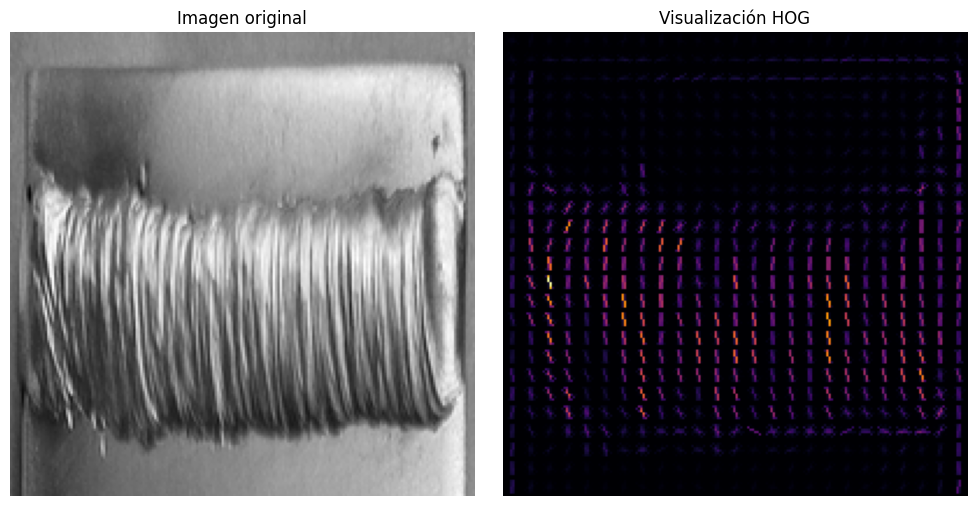

Longitud del vector HOG: 20736


In [ ]:
good_example = os.path.join(PROCESSED_GOOD_PATH, os.listdir(PROCESSED_GOOD_PATH)[0])
visualize_hog_example(good_example)

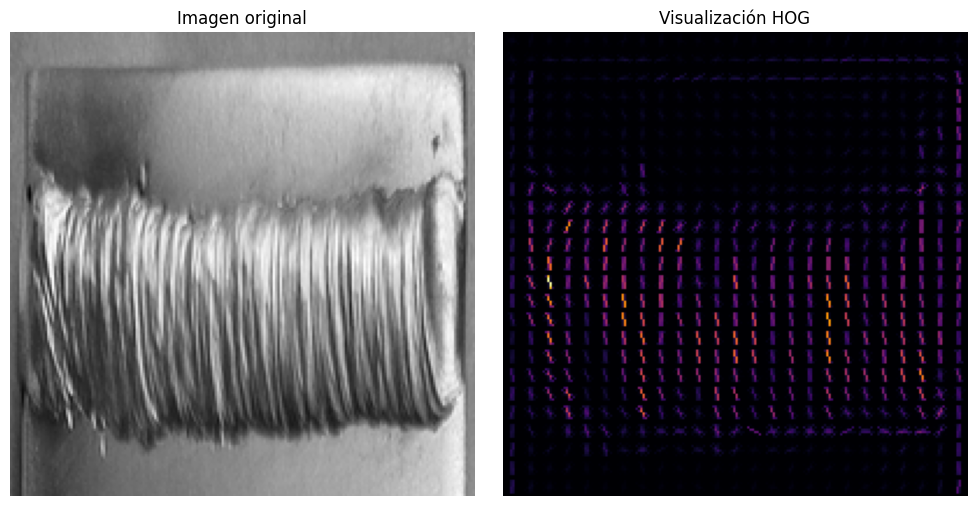

Longitud del vector HOG: 20736


In [ ]:
bad_example = os.path.join(PROCESSED_BAD_PATH, os.listdir(PROCESSED_BAD_PATH)[0])
visualize_hog_example(bad_example)

### **1.2. Resumen de la Calidad de los datos**
---

Con la finalidad de analizar la calidad de los datos, contamos con el siguiente codigo que nos permitirá resumir todo lo necesario para este apartado. Sin embargo, como tal no se hace un análisis de si se identifican documentos ilegibles durante la revisión del conjunto de datos, dado que el HOG nos limpia los datos por asi decirlo. Mientras que, por otra parte, la diversidad de formatos de imagen no impide llevar a cabo el HOG, por lo que no es un problema a considerar.


1. INFORMACIÓN BÁSICA DEL DATASET
Total de muestras: 120
Total de características HOG: 20736
Dimensiones del dataset: (120, 20738)

2. ANÁLISIS DE VALORES FALTANTES
No hay valores faltantes en las características HOG

3. ANÁLISIS DE VALORES ATÍPICOS
Total de valores atípicos: 72078
Porcentaje de valores atípicos: 2.90%
Nivel de outliers aceptable


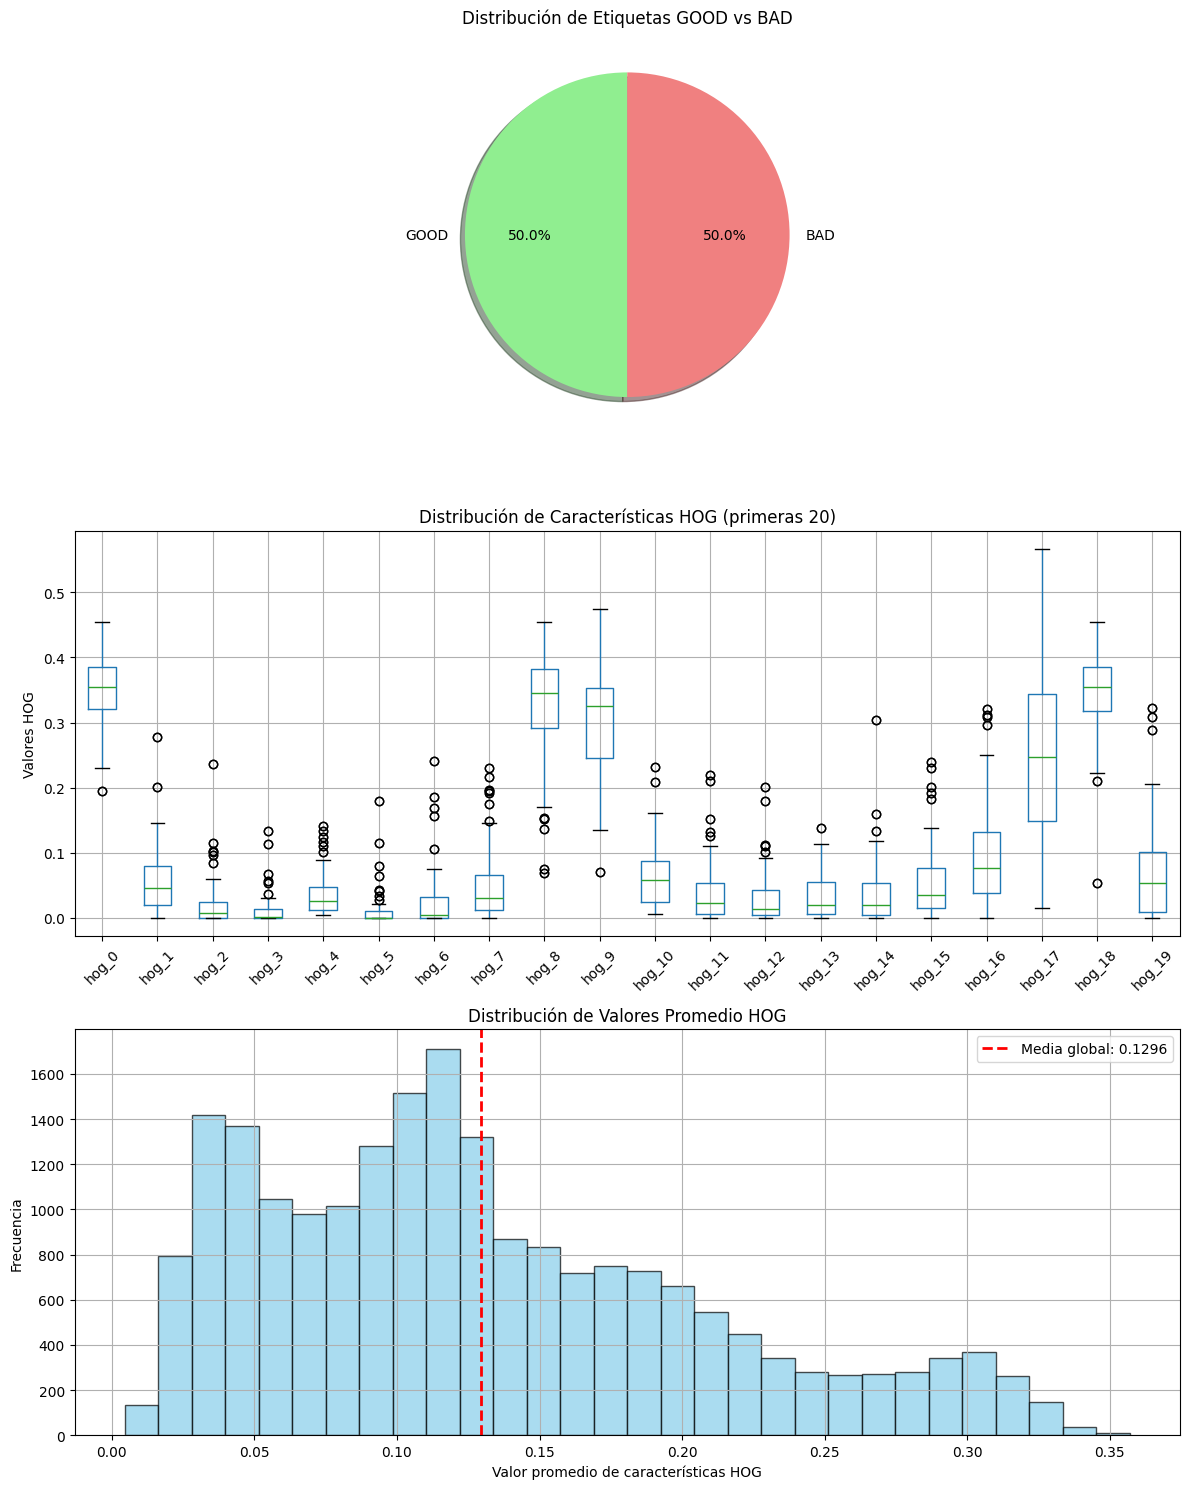

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def analyze_hog_dataset_quality(df, hog_features_prefix='hog_'):

    # Identificar columnas HOG
    hog_columns = [col for col in df.columns if col.startswith(hog_features_prefix)]

    if len(hog_columns) == 0:
        print("No se encontraron columnas HOG en el dataset")
        return

    # 1. ANÁLISIS BÁSICO DEL DATASET
    print("\n1. INFORMACIÓN BÁSICA DEL DATASET")

    print(f"Total de muestras: {len(df)}")
    print(f"Total de características HOG: {len(hog_columns)}")
    print(f"Dimensiones del dataset: {df.shape}")

    # 2. ANÁLISIS DE VALORES FALTANTES
    print("\n2. ANÁLISIS DE VALORES FALTANTES")
    missing_values = df[hog_columns].isnull().sum()
    total_missing = missing_values.sum()

    if total_missing == 0:
        print("No hay valores faltantes en las características HOG")
    else:
        print(f"Valores faltantes encontrados: {total_missing}")
        print("Columnas con valores faltantes:")
        for col, missing in missing_values[missing_values > 0].items():
            print(f"  - {col}: {missing} valores faltantes ({missing/len(df)*100:.2f}%)")

    # 3. DETECCIÓN DE VALORES ATÍPICOS (OUTLIERS)
    print("\n3. ANÁLISIS DE VALORES ATÍPICOS")

    # Usando el método IQR para detectar outliers
    Q1 = df[hog_columns].quantile(0.25)
    Q3 = df[hog_columns].quantile(0.75)
    IQR = Q3 - Q1

    outlier_mask = ((df[hog_columns] < (Q1 - 1.5 * IQR)) |
                   (df[hog_columns] > (Q3 + 1.5 * IQR)))

    outlier_counts = outlier_mask.sum()
    total_outliers = outlier_counts.sum()
    outlier_percentage = total_outliers / (len(df) * len(hog_columns)) * 100

    print(f"Total de valores atípicos: {total_outliers}")
    print(f"Porcentaje de valores atípicos: {outlier_percentage:.2f}%")

    if outlier_percentage < 5:
        print("Nivel de outliers aceptable")
    elif outlier_percentage < 10:
        print("Nivel moderado de outliers")
    else:
        print("Alto nivel de outliers")

    return {
        'missing_values': missing_values,
        'outlier_analysis': outlier_counts
    }

# Función adicional para visualizaciones
def plot_hog_dataset_quality(df, hog_features_prefix='hog_'):
    """
    Crea visualizaciones para el análisis de calidad del dataset HOG.
    """
    hog_columns = [col for col in df.columns if col.startswith(hog_features_prefix)]

    if len(hog_columns) == 0:
        print("No hay columnas HOG para visualizar")
        return

    # Crear figura con 3 subplots
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))

    # 1. DISTRIBUCIÓN DE ETIQUETAS (GRÁFICA RESTAURADA)
    if 'label' in df.columns:
        label_counts = df['label'].value_counts()
        colors = ['lightgreen', 'lightcoral'] if len(label_counts) == 2 else None

        axes[0].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%',
                   startangle=90, colors=colors, shadow=True)
        axes[0].set_title('Distribución de Etiquetas GOOD vs BAD')
    else:
        axes[0].text(0.5, 0.5, 'No se encontró la columna "label"',
                    ha='center', va='center', transform=axes[0].transAxes)
        axes[0].set_title('Distribución de Etiquetas')

    # 2. Distribución de valores HOG (primeras 20 características)
    sample_features = hog_columns[:20] if len(hog_columns) > 20 else hog_columns
    df[sample_features].boxplot(ax=axes[1])
    axes[1].set_title('Distribución de Características HOG (primeras 20)')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].set_ylabel('Valores HOG')

    # 3. Histograma de valores HOG
    df[hog_columns].mean().hist(ax=axes[2], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[2].set_xlabel('Valor promedio de características HOG')
    axes[2].set_ylabel('Frecuencia')
    axes[2].set_title('Distribución de Valores Promedio HOG')

    # Añadir línea vertical en la media
    mean_value = df[hog_columns].mean().mean()
    axes[2].axvline(mean_value, color='red', linestyle='--', linewidth=2,
                   label=f'Media global: {mean_value:.4f}')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

# EJECUCIÓN DEL ANÁLISIS
if __name__ == "__main__":
    # Cargar el dataset HOG
    try:
        hog_df = pd.read_csv("hog_features_dataset.csv")

        # Ejecutar análisis completo
        analysis_results = analyze_hog_dataset_quality(hog_df)

        # Generar visualizaciones
        plot_hog_dataset_quality(hog_df)

        # Guardar reporte de calidad
        with open("hog_dataset_quality_report.txt", "w") as f:
            f.write("REPORTE DE CALIDAD - DATASET HOG\n")
            f.write("=" * 50 + "\n")
            f.write(f"Fecha de análisis: {pd.Timestamp.now()}\n")
            f.write(f"Total muestras: {len(hog_df)}\n")
            f.write(f"Total características: {len([col for col in hog_df.columns if col.startswith('hog_')])}\n")

    except FileNotFoundError:
        print("Error: No se encontró el archivo 'hog_features_dataset.csv'")
        print("Asegúrate de que el archivo existe en el directorio actual")
    except Exception as e:
        print(f"Error durante el análisis: {e}")

Los resultados de este codigo nos muestran que de todas las muestras que se disponen, se trabaja con todas. Por otra parte, las caracteristicas del HOG no nos muestran datos faltantes. El caso de los valores atipicos muestra de que las imagenes presentan datos con pocos outliers, esto merece un análisis posterior mas detallado, pero es posible observar como el trabajo con HOG nos lleva a tener dataset con buena calidad.

Por otra parte, en otra forma de analisis de la calidad de los datos, podemos analizar a las imagenes mismas, espeficando caracteristicas generales de ellas como la intensidad promedio de cada uno de los puntos, y demás variables estadisticas aplicadas a caracteristicas propias de las imagenes.

In [ ]:
def extract_image_features(img_array, filename, label):
    """Extrae características estadísticas de la imagen completa"""
    features = {
        'filename': filename,
        'label': label,
        'mean_intensity': np.mean(img_array),
        'std_intensity': np.std(img_array),
        'min_intensity': np.min(img_array),
        'max_intensity': np.max(img_array),
        'median_intensity': np.median(img_array),
        'image_height': img_array.shape[0],
        'image_width': img_array.shape[1],
        'total_pixels': img_array.size
    }

    # Histogram features (10 bins)
    hist, _ = np.histogram(img_array, bins=10, range=(0, 255))
    for i, val in enumerate(hist):
        features[f'hist_bin_{i}'] = val

    # Percentiles
    percentiles = [10, 25, 50, 75, 90]
    for p in percentiles:
        features[f'percentile_{p}'] = np.percentile(img_array, p)

    # Textura - Gradientes
    grad_x = np.abs(np.gradient(img_array, axis=1))
    grad_y = np.abs(np.gradient(img_array, axis=0))
    features['gradient_mean'] = np.mean(grad_x + grad_y)
    features['gradient_std'] = np.std(grad_x + grad_y)

    return features

def create_region_statistics(img_array, filename, label, grid_size=5):
    """Crea estadísticas por regiones de la imagen"""
    height, width = img_array.shape
    records = []

    region_height = height // grid_size
    region_width = width // grid_size

    for i in range(grid_size):
        for j in range(grid_size):
            start_i = i * region_height
            end_i = (i + 1) * region_height if i < grid_size - 1 else height
            start_j = j * region_width
            end_j = (j + 1) * region_width if j < grid_size - 1 else width

            region = img_array[start_i:end_i, start_j:end_j]

            records.append({
                'filename': filename,
                'region_row': i,
                'region_col': j,
                'region_mean': np.mean(region),
                'region_std': np.std(region),
                'region_min': np.min(region),
                'region_max': np.max(region),
                'region_size': region.size,
                'label': label
            })

    return records

def procesar_imagen_para_dataset(ruta_imagen, label, resize_to=(200, 200), include_regions=True):
    """Procesa la imagen y extrae características para el dataset"""
    try:
        filename = os.path.basename(ruta_imagen)

        # Convertir a escala de grises y redimensionar
        img_array = img_to_grayscale_array(ruta_imagen, resize_to)

        # Extraer características globales
        global_features = extract_image_features(img_array, filename, label)

        # Extraer características por regiones (opcional)
        region_features = []
        if include_regions:
            region_features = create_region_statistics(img_array, filename, label, grid_size=5)

        print(f"✓ Procesada: {filename} - {img_array.shape} - Características: {len(global_features)}")
        return global_features, region_features, img_array.shape

    except Exception as e:
        print(f"✗ Error procesando {ruta_imagen}: {e}")
        return None, None, None

# Cargar el dataset existente para obtener la lista de imágenes procesadas
try:
    df_existente = pd.read_csv('dataset_imagenes_clasificadas.csv')
    print("✓ Dataset existente cargado")
except:
    print("ℹ️ No se encontró dataset existente, procesando desde carpetas...")
    df_existente = None

# Configuración
RESIZE_TO = (200, 200)  # Tamaño para redimensionar
INCLUDE_REGIONS = True  # Incluir estadísticas por regiones

print("="*70)
print("CREANDO DATASET DE ESCALA DE GRISES - MODO EFICIENTE")
print(f"Redimensionando a: {RESIZE_TO}")
print(f"Incluir regiones: {INCLUDE_REGIONS}")
print("="*70)

# Procesar imágenes basado en el dataset existente o desde carpetas
all_global_features = []
all_region_features = []
image_statistics = []

if df_existente is not None:
    # Usar el dataset existente como referencia
    print("\n📁 Procesando imágenes desde dataset existente...")

    for idx, row in df_existente.iterrows():
        filename = row['filename']
        label = row['label']
        clasificacion = 'GOOD' if label == 1 else 'BAD'

        # Determinar la carpeta de origen
        folder = RAW_GOOD_PATH if label == 1 else RAW_BAD_PATH
        filepath = os.path.join(folder, filename)

        if os.path.exists(filepath):
            print(f"Procesando {idx+1}/{len(df_existente)}: {filename} ({clasificacion})")

            global_feat, region_feat, img_shape = procesar_imagen_para_dataset(
                filepath, label, RESIZE_TO, INCLUDE_REGIONS
            )

            if global_feat:
                all_global_features.append(global_feat)
                if region_feat:
                    all_region_features.extend(region_feat)

                image_statistics.append({
                    'filename': filename,
                    'original_width': row['width'],
                    'original_height': row['height'],
                    'processed_width': img_shape[1],
                    'processed_height': img_shape[0],
                    'label': label,
                    'clasificacion': clasificacion
                })
        else:
            print(f"⚠️ Archivo no encontrado: {filename}")
else:
    # Procesar desde carpetas directamente
    print("\n📁 Procesando imágenes desde carpetas...")

    # Procesar imágenes GOOD
    valid_good_imgs = list(filter(is_valid_img, os.listdir(RAW_GOOD_PATH)))
    for i, filename in enumerate(valid_good_imgs):
        print(f"Procesando GOOD {i+1}/{len(valid_good_imgs)}: {filename}")
        filepath = os.path.join(RAW_GOOD_PATH, filename)

        global_feat, region_feat, img_shape = procesar_imagen_para_dataset(
            filepath, 1, RESIZE_TO, INCLUDE_REGIONS
        )

        if global_feat:
            all_global_features.append(global_feat)
            if region_feat:
                all_region_features.extend(region_feat)

            image_statistics.append({
                'filename': filename,
                'original_width': img_shape[1],  # Aproximación
                'original_height': img_shape[0],
                'processed_width': img_shape[1],
                'processed_height': img_shape[0],
                'label': 1,
                'clasificacion': 'GOOD'
            })

    # Procesar imágenes BAD
    valid_bad_imgs = list(filter(is_valid_img, os.listdir(RAW_BAD_PATH)))
    for i, filename in enumerate(valid_bad_imgs):
        print(f"Procesando BAD {i+1}/{len(valid_bad_imgs)}: {filename}")
        filepath = os.path.join(RAW_BAD_PATH, filename)

        global_feat, region_feat, img_shape = procesar_imagen_para_dataset(
            filepath, 0, RESIZE_TO, INCLUDE_REGIONS
        )

        if global_feat:
            all_global_features.append(global_feat)
            if region_feat:
                all_region_features.extend(region_feat)

            image_statistics.append({
                'filename': filename,
                'original_width': img_shape[1],
                'original_height': img_shape[0],
                'processed_width': img_shape[1],
                'processed_height': img_shape[0],
                'label': 0,
                'clasificacion': 'BAD'
            })

# Crear DataFrames
print("\n📊 Creando datasets...")

# Dataset de características globales
df_global = pd.DataFrame(all_global_features)
if not df_global.empty:
    df_global['clasificacion'] = df_global['label'].map({1: 'GOOD', 0: 'BAD'})

# Dataset de características por regiones
df_regions = pd.DataFrame(all_region_features)
if not df_regions.empty:
    df_regions['clasificacion'] = df_regions['label'].map({1: 'GOOD', 0: 'BAD'})

# Dataset de estadísticas de imágenes
df_img_stats = pd.DataFrame(image_statistics)

# Mostrar resultados
print("\n" + "="*70)
print("RESULTADOS")
print("="*70)

print(f"✅ Total de imágenes procesadas: {len(df_global)}")
print(f"📊 Registros de características globales: {len(df_global)}")
print(f"🔲 Registros de regiones: {len(df_regions)}")
print(f"📈 Imágenes GOOD: {len(df_global[df_global['label'] == 1])}")
print(f"📉 Imágenes BAD: {len(df_global[df_global['label'] == 0])}")

if not df_global.empty:
    print(f"\n💾 Uso de memoria:")
    print(f"   - Dataset global: {df_global.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")
    if not df_regions.empty:
        print(f"   - Dataset regiones: {df_regions.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

# Mostrar estructura de los datasets
print("\n🔍 Estructura del Dataset Global:")
print(f"   Columnas: {list(df_global.columns)}")
print(f"   Dimensiones: {df_global.shape}")

if not df_global.empty:
    print("\n📋 Primeras filas del dataset global:")
    display(df_global.head())

if not df_regions.empty:
    print(f"\n🔍 Dataset de regiones - ejemplo:")
    display(df_regions.head(10))

# Estadísticas detalladas
print("\n" + "="*70)
print("ESTADÍSTICAS DETALLADAS")
print("="*70)

if not df_global.empty:
    print("📈 Características globales por clasificación:")

    for label, name in [(1, 'GOOD'), (0, 'BAD')]:
        subset = df_global[df_global['label'] == label]
        print(f"\n{name}:")
        print(f"  Intensidad promedio: {subset['mean_intensity'].mean():.2f} ± {subset['mean_intensity'].std():.2f}")
        print(f"  Contraste (std): {subset['std_intensity'].mean():.2f} ± {subset['std_intensity'].std():.2f}")
        print(f"  Rango: [{subset['min_intensity'].min():.1f}, {subset['max_intensity'].max():.1f}]")

# Guardar datasets
print("\n" + "="*70)
print("GUARDANDO DATASETS")
print("="*70)

# Guardar dataset principal de características
df_global.to_csv('dataset_caracteristicas_globales.csv', index=False)
print("✓ Dataset de características globales guardado: 'dataset_caracteristicas_globales.csv'")

if not df_regions.empty:
    df_regions.to_csv('dataset_estadisticas_regiones.csv', index=False)
    print("✓ Dataset de estadísticas por regiones guardado: 'dataset_estadisticas_regiones.csv'")

df_img_stats.to_csv('dataset_estadisticas_imagenes.csv', index=False)
print("✓ Dataset de estadísticas de imágenes guardado: 'dataset_estadisticas_imagenes.csv'")

# Crear dataset consolidado
if not df_global.empty and not df_regions.empty:
    # Agregar estadísticas de regiones al dataset global
    region_stats = df_regions.groupby('filename').agg({
        'region_mean': ['mean', 'std'],
        'region_std': 'mean'
    }).round(3)

    region_stats.columns = ['region_mean_avg', 'region_mean_std', 'region_std_avg']
    region_stats = region_stats.reset_index()

    df_consolidado = pd.merge(df_global, region_stats, on='filename', how='left')
    df_consolidado.to_csv('dataset_consolidado_completo.csv', index=False)
    print("✓ Dataset consolidado guardado: 'dataset_consolidado_completo.csv'")

print("\n🎯 RESUMEN FINAL:")
print(f"   • Imágenes procesadas: {len(df_global)}")
print(f"   • Características por imagen: {len(df_global.columns) - 3}")  # excluyendo filename, label, clasificacion
print(f"   • Datasets creados: 3-4 archivos CSV")
print(f"   • Uso de memoria optimizado ✅")

# Mostrar ejemplo de una imagen específica
if not df_global.empty:
    print("\n" + "="*70)
    print("EJEMPLO DE IMAGEN PROCESADA")
    print("="*70)

    ejemplo = df_global.iloc[0]
    print(f"Archivo: {ejemplo['filename']}")
    print(f"Clasificación: {ejemplo['clasificacion']}")
    print(f"Intensidad promedio: {ejemplo['mean_intensity']:.2f}")
    print(f"Contraste (std): {ejemplo['std_intensity']:.2f}")
    print(f"Rango: [{ejemplo['min_intensity']:.0f}, {ejemplo['max_intensity']:.0f}]")

    if not df_regions.empty:
        regiones_ejemplo = df_regions[df_regions['filename'] == ejemplo['filename']]
        print(f"Regiones procesadas: {len(regiones_ejemplo)}")
        print("Estadísticas de regiones (primeras 5):")
        display(regiones_ejemplo.head())

✓ Dataset existente cargado
CREANDO DATASET DE ESCALA DE GRISES - MODO EFICIENTE
Redimensionando a: (200, 200)
Incluir regiones: True

📁 Procesando imágenes desde dataset existente...
Procesando 1/180: 1A0.jpg (GOOD)
✓ Procesada: 1A0.jpg - (200, 200) - Características: 27
Procesando 2/180: 1A1.jpg (GOOD)
✓ Procesada: 1A1.jpg - (200, 200) - Características: 27
Procesando 3/180: 1A2.jpg (GOOD)
✓ Procesada: 1A2.jpg - (200, 200) - Características: 27
Procesando 4/180: 1A3.jpg (GOOD)
✓ Procesada: 1A3.jpg - (200, 200) - Características: 27
Procesando 5/180: 1A4.jpg (GOOD)
✓ Procesada: 1A4.jpg - (200, 200) - Características: 27
Procesando 6/180: 1A5.jpg (GOOD)
✓ Procesada: 1A5.jpg - (200, 200) - Características: 27
Procesando 7/180: 1A6.jpg (GOOD)
✓ Procesada: 1A6.jpg - (200, 200) - Características: 27
Procesando 8/180: 1A7.jpg (GOOD)
✓ Procesada: 1A7.jpg - (200, 200) - Características: 27
Procesando 9/180: 1A8.jpg (GOOD)
✓ Procesada: 1A8.jpg - (200, 200) - Características: 27
Procesando 10/1

,filename,label,mean_intensity,std_intensity,min_intensity,max_intensity,median_intensity,image_height,image_width,total_pixels,...,hist_bin_8,hist_bin_9,percentile_10,percentile_25,percentile_50,percentile_75,percentile_90,gradient_mean,gradient_std,clasificacion
0,1A0.jpg,1,136.246450,50.530727,3,255,136.0,200,200,40000,...,3414,1187,67.0,96.0,136.0,173.00,208.0,16.063950,17.229578,GOOD
1,1A1.jpg,1,126.506550,49.482523,25,255,126.0,200,200,40000,...,2301,672,62.0,85.0,126.0,162.00,196.0,13.835187,13.348487,GOOD
2,1A2.jpg,1,122.077325,50.887513,22,255,116.0,200,200,40000,...,2449,910,59.0,79.0,116.0,158.25,198.0,17.405812,17.227272,GOOD
3,1A3.jpg,1,121.117625,50.469014,23,255,115.0,200,200,40000,...,2334,920,57.0,81.0,115.0,153.00,196.0,15.151288,14.457632,GOOD
4,1A4.jpg,1,112.725100,49.856405,20,255,108.0,200,200,40000,...,1934,587,49.0,74.0,108.0,143.00,188.0,17.690675,16.781804,GOOD



🔍 Dataset de regiones - ejemplo:


,filename,region_row,region_col,region_mean,region_std,region_min,region_max,region_size,label,clasificacion
0,1A0.jpg,0,0,115.350000,18.097065,74,146,1600,1,GOOD
1,1A0.jpg,0,1,133.090000,21.072005,73,182,1600,1,GOOD
2,1A0.jpg,0,2,167.607500,27.342109,123,222,1600,1,GOOD
3,1A0.jpg,0,3,183.459375,37.343585,127,243,1600,1,GOOD
4,1A0.jpg,0,4,178.956875,42.721321,67,247,1600,1,GOOD
5,1A0.jpg,1,0,103.666250,40.314031,3,253,1600,1,GOOD
6,1A0.jpg,1,1,112.305000,32.003429,34,227,1600,1,GOOD
7,1A0.jpg,1,2,154.363125,16.447797,105,200,1600,1,GOOD
8,1A0.jpg,1,3,159.236250,23.802005,77,201,1600,1,GOOD
9,1A0.jpg,1,4,172.670000,40.960467,75,246,1600,1,GOOD



ESTADÍSTICAS DETALLADAS
📈 Características globales por clasificación:

GOOD:
  Intensidad promedio: 108.68 ± 13.30
  Contraste (std): 46.30 ± 2.97
  Rango: [3.0, 255.0]

BAD:
  Intensidad promedio: 112.68 ± 13.17
  Contraste (std): 49.42 ± 3.92
  Rango: [0.0, 255.0]

GUARDANDO DATASETS
✓ Dataset de características globales guardado: 'dataset_caracteristicas_globales.csv'
✓ Dataset de estadísticas por regiones guardado: 'dataset_estadisticas_regiones.csv'
✓ Dataset de estadísticas de imágenes guardado: 'dataset_estadisticas_imagenes.csv'
✓ Dataset consolidado guardado: 'dataset_consolidado_completo.csv'

🎯 RESUMEN FINAL:
   • Imágenes procesadas: 180
   • Características por imagen: 25
   • Datasets creados: 3-4 archivos CSV
   • Uso de memoria optimizado ✅

EJEMPLO DE IMAGEN PROCESADA
Archivo: 1A0.jpg
Clasificación: GOOD
Intensidad promedio: 136.25
Contraste (std): 50.53
Rango: [3, 255]
Regiones procesadas: 25
Estadísticas de regiones (primeras 5):


,filename,region_row,region_col,region_mean,region_std,region_min,region_max,region_size,label,clasificacion
0,1A0.jpg,0,0,115.350000,18.097065,74,146,1600,1,GOOD
1,1A0.jpg,0,1,133.090000,21.072005,73,182,1600,1,GOOD
2,1A0.jpg,0,2,167.607500,27.342109,123,222,1600,1,GOOD
3,1A0.jpg,0,3,183.459375,37.343585,127,243,1600,1,GOOD
4,1A0.jpg,0,4,178.956875,42.721321,67,247,1600,1,GOOD


### **1.3. Tipos de variables**
---

En el contexto del proyecto que acá queremos adelantar, se espera estimar si a un conjunto de datos HOG le corresponde una etiqueta buena o mala. Por lo tanto, de variables continuas espera llegarse a variables categoricas. En ese sentido, se espera estimar si un conjunto de datos corresponde con tal variable categorica, ese es, en general, el tipo de variables con el cual pretendemos trabajar, eso quedará constatado en el codigo a continuación. Ahora bien, se puede analizar también si desde nuestros propios datos presentamos un desbalanceo en cuanto a las imagenes que consideramos buenas o malas, eso depende de aquello que nosotros subamos a la carpeta con la cual vamos a trabajar, pero es importante llevar un conteo de la cantidad de datos correspondiente a cada etiqueta que nosotros tenemos, ese tipo de conteo será posible con base en el código que propondremos a continuación, mientras que queremos tambien buscar, con base en él, si el conjunto de datos cuenta con variables adicionales.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

def analyze_dataset_structure(df, target_column='label', hog_prefix='hog_'):

    # 1. ANÁLISIS DE LA VARIABLE OBJETIVO
    print("\n1. ¿EL CONJUNTO DE DATOS TIENE UNA VARIABLE OBJETIVO A ESTIMAR?")

    if target_column in df.columns:
        print(f"SÍ, existe la variable objetivo: '{target_column}'")

        # Determinar si es continua o categórica
        unique_values = df[target_column].nunique()
        data_type = df[target_column].dtype

        if df[target_column].dtype in ['object', 'category'] or unique_values < 10:
            print(f"Tipo de variable: CATEGÓRICA")
            print(f"   - Valores únicos: {unique_values}")
            print(f"   - Categorías: {list(df[target_column].unique())}")
        else:
            print(f"Tipo de variable: CONTINUA")
            print(f"   - Rango: [{df[target_column].min():.2f}, {df[target_column].max():.2f}]")
            print(f"   - Valores únicos: {unique_values}")

    else:
        print("NO se encontró una variable objetivo específica")
        # Buscar columnas que podrían ser la variable objetivo
        potential_targets = []
        for col in df.columns:
            if df[col].nunique() < 10 and df[col].dtype in ['object', 'category']:
                potential_targets.append(col)

        if potential_targets:
            print(f"Columnas que podrían ser la variable objetivo: {potential_targets}")

    # 2. ANÁLISIS DE DISTRIBUCIÓN Y BALANCEO DE ETIQUETAS
    print("\n2. DISTRIBUCIÓN Y BALANCEO DE ETIQUETAS")

    if target_column in df.columns:
        label_counts = df[target_column].value_counts()
        total_samples = len(df)

        print("Distribución de etiquetas:")
        for label, count in label_counts.items():
            percentage = (count / total_samples) * 100
            print(f"   - {label}: {count} muestras ({percentage:.2f}%)")

        # Análisis de balanceo
        if len(label_counts) >= 2:
            min_count = label_counts.min()
            max_count = label_counts.max()
            balance_ratio = min_count / max_count

            print(f"\n⚖️  ANÁLISIS DE BALANCEO:")
            print(f"   - Ratio de balance: {balance_ratio:.3f}")
            print(f"   - Clase mayoritaria: {label_counts.idxmax()} ({max_count} muestras)")
            print(f"   - Clase minoritaria: {label_counts.idxmin()} ({min_count} muestras)")

            if balance_ratio > 0.7:
                print("   DATASET BALANCEADO")
            elif balance_ratio > 0.4:
                print("   DATASET MODERADAMENTE DESBALANCEADO")
            elif balance_ratio > 0.2:
                print("   DATASET DESBALANCEADO")
            else:
                print("   DATASET MUY DESBALANCEADO")

            # Recomendaciones según el balance
            if balance_ratio < 0.7:
                print(f"\n💡 RECOMENDACIONES PARA MEJORAR EL BALANCEO:")
                if balance_ratio < 0.4:
                    print("   - Aplicar técnicas de sobremuestreo (SMOTE, ADASYN)")
                    print("   - Considerar técnicas de submuestreo")
                print("   - Usar métricas apropiadas (F1-score, Matriz de Confusión)")
                print("   - Considerar pesos de clase en el modelo")
        else:
            print("  Solo hay una clase en la variable objetivo")
    else:
        print(" No se puede analizar el balanceo - variable objetivo no encontrada")

    # 3. ANÁLISIS DE VARIABLES ADICIONALES
    print("\n3. VARIABLES ADICIONALES EN EL DATASET")

    # Identificar tipos de variables
    hog_columns = [col for col in df.columns if col.startswith(hog_prefix)]
    other_columns = [col for col in df.columns if not col.startswith(hog_prefix) and col != target_column]

    print(f" Variables HOG (características de imagen): {len(hog_columns)}")
    print(f" Otras variables: {len(other_columns)}")

    if other_columns:
        print(f"\n🔍 Variables adicionales encontradas:")
        for col in other_columns:
            dtype = df[col].dtype
            unique_vals = df[col].nunique()
            null_count = df[col].isnull().sum()

            print(f"   - {col}:")
            print(f"     Tipo: {dtype}")
            print(f"     Valores únicos: {unique_vals}")
            print(f"     Valores nulos: {null_count}")

            if df[col].dtype in ['int64', 'float64']:
                print(f"     Rango: [{df[col].min():.2f}, {df[col].max():.2f}]")
                print(f"     Media: {df[col].mean():.2f}")

    # 4. ANÁLISIS DESCRIPTIVO DE VARIABLES HOG
    print("\n4. ANÁLISIS DESCRIPTIVO DE CARACTERÍSTICAS HOG")

    if hog_columns:
        print(f" Total de características HOG: {len(hog_columns)}")

        # Estadísticas básicas de características HOG
        hog_stats = df[hog_columns].describe()

        print(f" Estadísticas globales de características HOG:")
        print(f"   - Rango general: [{df[hog_columns].min().min():.6f}, {df[hog_columns].max().max():.6f}]")
        print(f"   - Media global: {df[hog_columns].mean().mean():.8f}")
        print(f"   - Desviación estándar global: {df[hog_columns].std().mean():.8f}")

        # Análisis de valores nulos en HOG
        hog_missing = df[hog_columns].isnull().sum().sum()
        if hog_missing == 0:
            print("    No hay valores faltantes en características HOG")
        else:
            print(f"    Valores faltantes en HOG: {hog_missing}")

        # Recomendaciones para incorporación al modelo
        print(f"\n💡 RECOMENDACIONES PARA INCORPORACIÓN AL MODELO:")
        print(f"   - CARACTERÍSTICAS HOG: SÍ incorporar ({len(hog_columns)} características)")
        if other_columns:
            print(f"   - OTRAS VARIABLES: Evaluar individualmente")
            for col in other_columns:
                # Evaluar si la variable podría ser útil
                usefulness = "Potencialmente útil" if df[col].nunique() > 1 else "Poco útil"
                print(f"     * {col}: {usefulness}")
        else:
            print("   - No hay otras variables adicionales para incorporar")
    else:
        print(" No se encontraron características HOG en el dataset")




# EJECUCIÓN PRINCIPAL
if __name__ == "__main__":
    print("🚀 INICIANDO ANÁLISIS ESTRUCTURAL COMPLETO")
    print("=" * 70)

    try:
        # Cargar el dataset
        df = pd.read_csv("hog_features_dataset.csv")

        # Ejecutar análisis
        analyze_dataset_structure(df)

    except FileNotFoundError:
        print(" Error: No se encontró el archivo 'hog_features_dataset.csv'")
        print(" Asegúrate de que el archivo existe en el directorio actual")
    except Exception as e:
        print(f" Error durante el análisis: {e}")

🚀 INICIANDO ANÁLISIS ESTRUCTURAL COMPLETO

1. ¿EL CONJUNTO DE DATOS TIENE UNA VARIABLE OBJETIVO A ESTIMAR?
SÍ, existe la variable objetivo: 'label'
Tipo de variable: CATEGÓRICA
   - Valores únicos: 2
   - Categorías: ['GOOD', 'BAD']

2. DISTRIBUCIÓN Y BALANCEO DE ETIQUETAS
Distribución de etiquetas:
   - GOOD: 60 muestras (50.00%)
   - BAD: 60 muestras (50.00%)

⚖️  ANÁLISIS DE BALANCEO:
   - Ratio de balance: 1.000
   - Clase mayoritaria: GOOD (60 muestras)
   - Clase minoritaria: GOOD (60 muestras)
   DATASET BALANCEADO

3. VARIABLES ADICIONALES EN EL DATASET
 Variables HOG (características de imagen): 20736
 Otras variables: 1

🔍 Variables adicionales encontradas:
   - filename:
     Tipo: object
     Valores únicos: 60
     Valores nulos: 0

4. ANÁLISIS DESCRIPTIVO DE CARACTERÍSTICAS HOG
 Total de características HOG: 20736
 Estadísticas globales de características HOG:
   - Rango general: [0.000000, 0.646532]
   - Media global: 0.12959977
   - Desviación estándar global: 0.0686572

### **1.4. Relación Entre Variables**
---

A continuación, se mostrará en codigo cómo el resultado del Hog no evidencia una correlación entre las variables y, además, tampoco se evidencia redundancia en los datos. De esta manera, los datos son tan ricos que no hace falta tampoco eliminar ninguno. Esto se mostrará tanto bajo la forma de imagenes como de los datasets con base en los cuales es posible construir dichas imagenes.

 ANÁLISIS DE CORRELACIONES Y REDUNDANCIA HOG
 ANÁLISIS RÁPIDO HOG
 Características HOG encontradas: 20736
 Dimensiones del dataset: (120, 20738)
 Muestra de características: ['hog_0', 'hog_1', 'hog_2', 'hog_3', 'hog_4']

 INICIANDO ANÁLISIS DE CORRELACIONES Y REDUNDANCIA
   - Muestreando 80 de 20736 características

1. CALCULANDO MATRIZ DE CORRELACIÓN (Optimizado)
 Estadísticas de correlación:
   - Correlación promedio: 0.0116
   - Correlación máxima: 0.5660
   - Correlación mínima: -0.6230

2. CORRELACIONES ALTAS (> 0.95)
 Pares altamente correlacionados: 0
    No se encontraron correlaciones altas
 Identificando variables redundantes...

 RESUMEN DE REDUCCIÓN:
   - Características originales: 80
   - Características a mantener: 0
   - Características redundantes a eliminar: 0
   - Reducción del dataset: 0.0%

 GENERANDO VISUALIZACIONES
 Generando visualizaciones para 80 características...


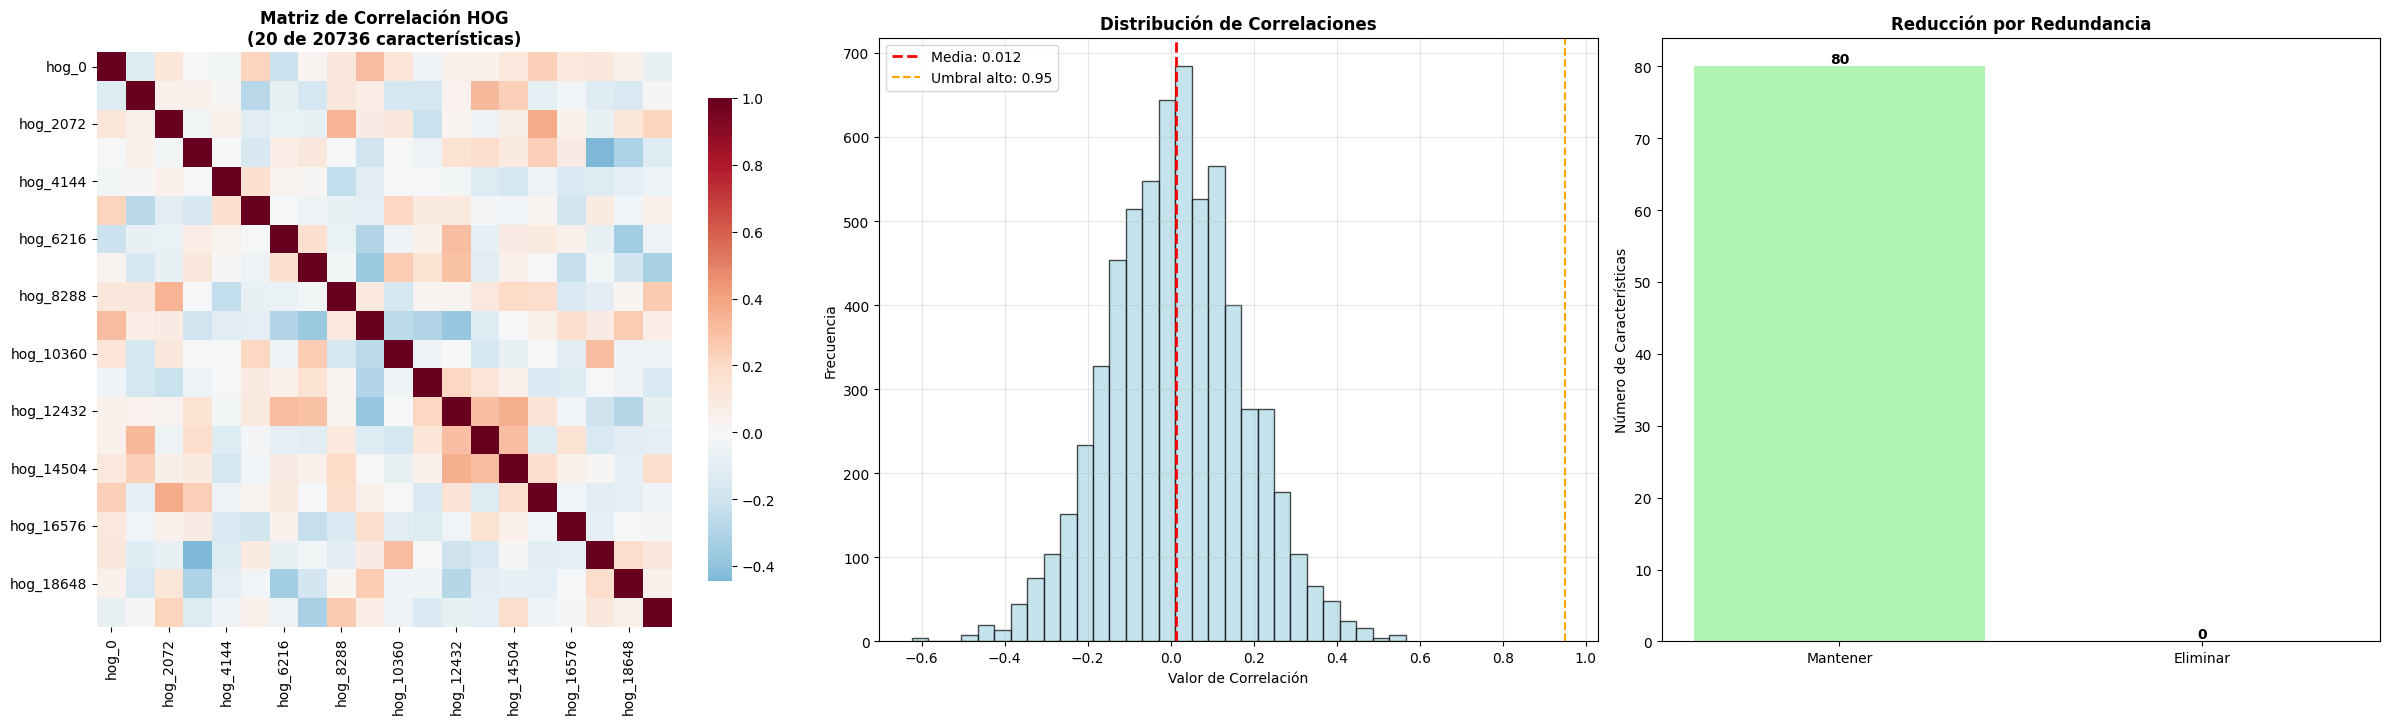


 DETALLE DE VARIABLES REDUNDANTES:
   - Características totales analizadas: 80
   - Grupos redundantes identificados: 0
   - Características a mantener: 80
   - Características a eliminar: 0
   - Reducción del dataset: 0.0%
 CREANDO DATASET REDUCIDO
 No hay variables redundantes para eliminar
 Error durante el análisis: too many values to unpack (expected 2)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
import warnings
warnings.filterwarnings('ignore')

def analyze_hog_correlations_optimized(df, hog_prefix='hog_', sample_size=30, correlation_threshold=0.95):
    # Identificar columnas HOG
    hog_columns = [col for col in df.columns if col.startswith(hog_prefix)]

    if len(hog_columns) == 0:
        print(" No se encontraron columnas HOG en el dataset")
        return None

    # ESTRATEGIA DE OPTIMIZACIÓN: Muestreo inteligente
    if len(hog_columns) > 100:
        # Seleccionar características de forma estratégica (no consecutivas)
        step = max(1, len(hog_columns) // 80)
        selected_hog_columns = hog_columns[::step][:80]
        print(f"   - Muestreando {len(selected_hog_columns)} de {len(hog_columns)} características")
    else:
        selected_hog_columns = hog_columns

    # 1. MATRIZ DE CORRELACIÓN OPTIMIZADA
    print("\n1. CALCULANDO MATRIZ DE CORRELACIÓN (Optimizado)")

    # Calcular matriz de correlación solo con las columnas seleccionadas
    correlation_matrix = df[selected_hog_columns].corr()

    # Estadísticas rápidas de la matrix de correlación
    corr_values = correlation_matrix.values.flatten()
    corr_values = corr_values[~np.isclose(corr_values, 1.0)]  # Excluir diagonal

    print(f" Estadísticas de correlación:")
    print(f"   - Correlación promedio: {np.mean(corr_values):.4f}")
    print(f"   - Correlación máxima: {np.max(corr_values):.4f}")
    print(f"   - Correlación mínima: {np.min(corr_values):.4f}")

    # 2. IDENTIFICACIÓN RÁPIDA DE CORRELACIONES ALTAS
    print(f"\n2. CORRELACIONES ALTAS (> {correlation_threshold})")

    high_corr_pairs = []
    # Optimizar búsqueda de correlaciones altas
    n_features = len(correlation_matrix.columns)

    for i in range(n_features):
        for j in range(i+1, n_features):
            corr_value = abs(correlation_matrix.iloc[i, j])
            if corr_value > correlation_threshold:
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_value
                ))

    print(f" Pares altamente correlacionados: {len(high_corr_pairs)}")

    if high_corr_pairs:
        print("\n Top 5 pares más correlacionados:")
        high_corr_pairs.sort(key=lambda x: x[2], reverse=True)
        for feat1, feat2, corr in high_corr_pairs[:5]:
            print(f"   - {feat1} vs {feat2}: {corr:.4f}")
    else:
        print("    No se encontraron correlaciones altas")

    # 3. IDENTIFICACIÓN DE VARIABLES REDUNDANTES


    redundant_features_to_remove = identify_redundant_features(correlation_matrix, selected_hog_columns, correlation_threshold)

    return {
        'correlation_matrix': correlation_matrix,
        'high_corr_pairs': high_corr_pairs,
        'hog_columns': selected_hog_columns,
        'original_hog_count': len(hog_columns),
        'redundant_features_to_remove': redundant_features_to_remove
    }

def identify_redundant_features(correlation_matrix, feature_names, correlation_threshold=0.95):
    """
    Identifica variables redundantes basándose en correlaciones altas.
    """
    print(" Identificando variables redundantes...")

    # Crear un grafo de correlaciones
    correlated_groups = []
    visited = set()

    for i, feat1 in enumerate(feature_names):
        if feat1 in visited:
            continue

        # Encontrar todas las características altamente correlacionadas con feat1
        correlated_group = [feat1]
        visited.add(feat1)

        for j, feat2 in enumerate(feature_names):
            if feat2 not in visited and i != j:
                corr_value = abs(correlation_matrix.iloc[i, j])
                if corr_value > correlation_threshold:
                    correlated_group.append(feat2)
                    visited.add(feat2)

        if len(correlated_group) > 1:
            correlated_groups.append(correlated_group)

    # Seleccionar variables a eliminar (mantener una por grupo)
    features_to_keep = []
    features_to_remove = []

    for group in correlated_groups:
        # Mantener la primera característica del grupo, eliminar las demás
        features_to_keep.append(group[0])
        features_to_remove.extend(group[1:])

        print(f"    Grupo redundante ({len(group)} características):")
        print(f"      Mantener: {group[0]}")
        print(f"      Eliminar: {', '.join(group[1:])}")

    # También identificar características con varianza cercana a cero
    print(f"\n RESUMEN DE REDUCCIÓN:")
    print(f"   - Características originales: {len(feature_names)}")
    print(f"   - Características a mantener: {len(features_to_keep) + (len(feature_names) - len(visited))}")
    print(f"   - Características redundantes a eliminar: {len(features_to_remove)}")
    print(f"   - Reducción del dataset: {(len(features_to_remove)/len(feature_names)*100):.1f}%")

    return {
        'correlated_groups': correlated_groups,
        'features_to_keep': features_to_keep,
        'features_to_remove': features_to_remove,
        'reduction_percentage': (len(features_to_remove)/len(feature_names)*100)
    }

def plot_optimized_correlation_matrix(df, analysis_results, sample_size=20):
    """
    Visualización optimizada de la matriz de correlaciones.
    """
    if analysis_results is None:
        print(" No hay resultados para visualizar")
        return

    hog_columns = analysis_results['hog_columns']
    correlation_matrix = analysis_results['correlation_matrix']
    redundant_info = analysis_results['redundant_features_to_remove']

    if len(hog_columns) == 0:
        print("No hay columnas HOG para visualizar")
        return

    print(f" Generando visualizaciones para {len(hog_columns)} características...")

    # Crear figura con 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 7))

    # 1. HEATMAP OPTIMIZADO
    if len(hog_columns) > sample_size:
        heatmap_cols = hog_columns[::max(1, len(hog_columns)//sample_size)][:sample_size]
    else:
        heatmap_cols = hog_columns

    corr_heatmap = df[heatmap_cols].corr()

    # Heatmap optimizado
    sns.heatmap(corr_heatmap, ax=ax1, cmap='RdBu_r', center=0,
                square=True, cbar_kws={'shrink': 0.8},
                xticklabels=2, yticklabels=2)

    original_count = analysis_results.get('original_hog_count', len(hog_columns))
    ax1.set_title(f'Matriz de Correlación HOG\n({len(heatmap_cols)} de {original_count} características)',
                 fontsize=12, fontweight='bold')

    # 2. HISTOGRAMA DE CORRELACIONES
    corr_values = correlation_matrix.values.flatten()
    corr_values = corr_values[~np.isclose(corr_values, 1.0)]

    ax2.hist(corr_values, bins=30, alpha=0.7, color='lightblue', edgecolor='black')

    # Líneas de referencia
    mean_corr = np.mean(corr_values)
    ax2.axvline(mean_corr, color='red', linestyle='--', linewidth=2,
               label=f'Media: {mean_corr:.3f}')
    ax2.axvline(0.95, color='orange', linestyle='--', linewidth=1.5,
               label='Umbral alto: 0.95')

    ax2.set_xlabel('Valor de Correlación')
    ax2.set_ylabel('Frecuencia')
    ax2.set_title('Distribución de Correlaciones', fontsize=12, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. GRÁFICO DE REDUNDANCIA
    ax3.bar(['Mantener', 'Eliminar'],
            [len(hog_columns) - len(redundant_info['features_to_remove']),
             len(redundant_info['features_to_remove'])],
            color=['lightgreen', 'lightcoral'], alpha=0.7)

    ax3.set_ylabel('Número de Características')
    ax3.set_title('Reducción por Redundancia', fontsize=12, fontweight='bold')

    # Añadir valores en las barras
    for i, v in enumerate([len(hog_columns) - len(redundant_info['features_to_remove']),
                          len(redundant_info['features_to_remove'])]):
        ax3.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Mostrar información detallada de redundancia
    print(f"\n DETALLE DE VARIABLES REDUNDANTES:")
    print(f"   - Características totales analizadas: {len(hog_columns)}")
    print(f"   - Grupos redundantes identificados: {len(redundant_info['correlated_groups'])}")
    print(f"   - Características a mantener: {len(hog_columns) - len(redundant_info['features_to_remove'])}")
    print(f"   - Características a eliminar: {len(redundant_info['features_to_remove'])}")
    print(f"   - Reducción del dataset: {redundant_info['reduction_percentage']:.1f}%")

    # Mostrar primeros grupos redundantes
    if redundant_info['correlated_groups']:
        print(f"\n PRIMEROS GRUPOS REDUNDANTES:")
        for i, group in enumerate(redundant_info['correlated_groups'][:3]):
            print(f"   Grupo {i+1}:")
            print(f"      Mantener: {group[0]}")
            print(f"      Eliminar: {', '.join(group[1:])}")

def create_reduced_dataset(df, analysis_results, hog_prefix='hog_'):
    if analysis_results is None:
        print(" No hay resultados para procesar")
        return df

    redundant_info = analysis_results['redundant_features_to_remove']
    features_to_remove = redundant_info['features_to_remove']

    if not features_to_remove:
        print(" No hay variables redundantes para eliminar")
        return df

    # Crear copia del dataset original
    df_reduced = df.copy()

    # Eliminar variables redundantes
    df_reduced = df_reduced.drop(columns=features_to_remove)

    print(f"\n DATASET REDUCIDO CREADO:")
    print(f"   - Columnas originales: {df.shape[1]}")
    print(f"   - Columnas después de reducción: {df_reduced.shape[1]}")
    print(f"   - Columnas eliminadas: {len(features_to_remove)}")
    print(f"   - Reducción: {(len(features_to_remove)/df.shape[1]*100):.1f}%")

    # Guardar lista de características eliminadas
    removal_report = {
        'features_removed': features_to_remove,
        'removal_timestamp': pd.Timestamp.now(),
        'original_shape': df.shape,
        'reduced_shape': df_reduced.shape
    }

    return df_reduced, removal_report

def quick_hog_analysis(df, hog_prefix='hog_'):
    """
    Análisis rápido para ver el estado del dataset HOG.
    """
    hog_columns = [col for col in df.columns if col.startswith(hog_prefix)]

    if not hog_columns:
        print(" No se encontraron características HOG")
        return

    print(" ANÁLISIS RÁPIDO HOG")

    print(f" Características HOG encontradas: {len(hog_columns)}")
    print(f" Dimensiones del dataset: {df.shape}")

    # Estadísticas básicas de una muestra
    sample_cols = hog_columns[:5]
    print(f" Muestra de características: {sample_cols}")

    return len(hog_columns)

# EJECUCIÓN PRINCIPAL
if __name__ == "__main__":
    print(" ANÁLISIS DE CORRELACIONES Y REDUNDANCIA HOG")

    try:
        df = pd.read_csv("hog_features_dataset.csv")

        # Análisis rápido inicial
        hog_count = quick_hog_analysis(df)

        if hog_count and hog_count > 0:
            print("\n" + "=" * 70)
            print(" INICIANDO ANÁLISIS DE CORRELACIONES Y REDUNDANCIA")

            # Ejecutar análisis optimizado
            analysis_results = analyze_hog_correlations_optimized(df)

            if analysis_results is not None:
                print("\n" + "=" * 70)
                print(" GENERANDO VISUALIZACIONES")
                plot_optimized_correlation_matrix(df, analysis_results)

                # Crear dataset reducido
                print(" CREANDO DATASET REDUCIDO")
                df_reduced, removal_report = create_reduced_dataset(df, analysis_results)

                # Guardar dataset reducido
                df_reduced.to_csv("hog_features_dataset_reduced.csv", index=False)
                print(f" Dataset reducido guardado como: 'hog_features_dataset_reduced.csv'")

                print("\n ANÁLISIS COMPLETADO EXITOSAMENTE")
                print(f" Resumen final:")
                print(f"   - Características HOG originales: {analysis_results['original_hog_count']}")
                print(f"   - Características eliminadas: {len(removal_report['features_removed'])}")
                print(f"   - Reducción aplicada: {removal_report['reduction_percentage']:.1f}%")

            else:
                print("\n No se pudo realizar el análisis de correlaciones")
        else:
            print("\n No hay características HOG para analizar")

    except FileNotFoundError:
        print(" Error: No se encontró el archivo 'hog_features_dataset.csv'")
        print(" Asegúrate de que el archivo existe en el directorio actual")
    except Exception as e:
        print(f" Error durante el análisis: {e}")

## **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistente docente :**
  * [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*